# Lambda School Data Science - Unit 1 Sprint 3 Module 1

---

## Module Project: Simple Linear Regression


### Learning Objectives 

- identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- identify linear and nonlinear relationships from a scatterplot
- calculate and interpret linear correlation
- calculate and interpret the slope and intercept of a simple linear regression model
- predict a response from a simple linear regression model
- calculate and interpret a residual

### Total notebook points: 14

## Part A

## Introduction

### Is head size related to brain weight in healthy adult humans?

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characteristics such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

(Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.)

Use the above information to complete Tasks 1 - 13

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [1]:
# Task 1

# Imports
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)
# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Task 1 - Test**

In [2]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2**

The two variables we are interested in - for now - are 

* `Brain` - the brain weight in g
* `Head` - the head size in cubic cm

If we wish to predict brain weight from head size, which variable is the **independent variable** (also called the feature, explanatory, or x variable) and which variable is the **dependent variable** (also called the target, response or y variable)?

Using the DataFrame `df` you loaded above assign columns to the independent and dependent variables

* Assign the DataFrame column of the independent variable to `ind_x`
* Assign the DataFrame column of dependent variable to `dep_y`

In [3]:
# Task 2

# YOUR CODE HERE
ind_x = df['Head']
dep_y = df['Brain']

**Task 2 - Test**

In [4]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Create a plot

This task will not be autograded - but it is part of the project!

Create a scatterplot showing the relationship between brain weight and head size.  Make sure to plot the correct variable on the correct axis and label your axes.

* Import your plotting library
* Plot your x- and y-variables on a scatter plot
* Label the axes
* Give your plot a title!

Text(0, 0.5, 'Brain Weight')

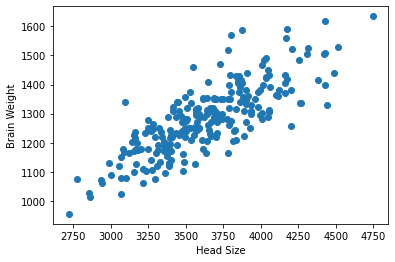

In [5]:
# Task 3
# (NOT autograded but fill in your code!)

# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x=ind_x,y=dep_y)
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

**Task 4** Describe your plot

Select the correct description of the strength and direction of the relationship between the independent and dependent variables shown in the plot you created in Task 3. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: There appears to be a negative linear relationship between the independent and dependent variables.

B: There appears to be a non-linear relationship between the independent and dependent variables.

C: There appears to be no linear relationship between the independent and dependent variables.

D: There appears to be a positive linear relationship between the independent and dependent variables.


In [6]:
# Task 4

# YOUR CODE HERE
Answer = 'D'


**Task 4 Test**

In [7]:
# Task 4 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Missing data

Now, let's determine if there is any missing data in the dataset. If there are null values, drop the row that contains a missing value(s).

* Check for missing/null values and assign the sum to `num_null` - the result should be the sum of **all** the null values and a **single integer** (*Hint: you will compute the sum of a sum*)
* If there are null values, drop them in place (your DataFrame should still be (`df`)

In [8]:
# Task 5

# YOUR CODE HERE
num_null = df.isnull().sum().sum()


**Task 5 - Test**

In [9]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Correlation coefficient

Now that we've explored our data through a plot and checked for null values, we can move on to some calculations. First, we're going to calculate and interpret the correlation coefficient for the relationship between *head size* and *brain weight*.

* Import import scipy.stats as st
* Calculate the correlation coefficient and assign it to the variable `r`. Remember that the output of `st.pearsonr()` is *two* values, the correlation and the p-value for the correlation.

In [10]:
# Task 6

# YOUR CODE HERE
import scipy.stats as st 
r,_ = st.pearsonr(ind_x,dep_y)

# View the results
print('Correlation coefficient:', r)


Correlation coefficient: 0.7995697092542963


**Task 6 - Test**

In [11]:
# Task 6 - Test

assert isinstance(r, float), 'Make sure to assign only the correlation (not the correlation and p-value) to the variable r.'

**Task 6** - Correlation coefficient written answer

Comment on the correlation coefficient value: Does the value align with your above plot? Is it a strong correlation or a weak correlation? In what direction? Your answer is not autograded but it is required for a complete project.

It is a strong postitive correlation and matches the plot shown above

**Task 7** - Correlation coefficient, part 2

**Without** doing any other calculations, determine the correlation of *brain weight* with *head size*.

* Assign your result to `r_2`; this value should be a float.

In [12]:
round(.8,2)

0.8

In [13]:
# Task 7

# YOUR CODE HERE

r_2 = r

# View the results
print('Correlation coefficient, part 2:', r_2)

Correlation coefficient, part 2: 0.7995697092542963


**Task 7 - Test**

In [14]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Linear model

Now that we've calculated the correlation coefficient, we going to fit a linear model to our two variables. We'll use the `statsmodels` to calculate the least-squares regression coefficients (slope and intercept). Our two variables are head size (`Head`) and brain weight (`Brain`).

* The import statement has been provided (don't edit this)
* Create and fit your model in one step; assign it to `model` (*Hint: remember the format of the input data is `Y ~ X`*)
* Using the `model.params[1]` method, assign the slope to the variable `slope`. Your variable should be a float (`numpy.float64`).
* Using the same `model.params[0]` method, assign the intercept to the variable `intercept`. Your variable should be a float (`numpy.float64`).

In [15]:
# Task 8

# Import OLS from statsmodel
from statsmodels.formula.api import ols

# Set-up and fit the model in one step
model = ols('Brain ~ Head',data=df).fit()

# YOUR CODE HERE
slope = model.params[1]
intercept = model.params[0]
# View the model parameters
print('The slope is:', slope)
print('The intercept is:', intercept)

The slope is: 0.2634293394893992
The intercept is: 325.573421049442


**Task 8 - Test**

In [16]:
# Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** Writing the linear equation

Select the statement that correctly shows the linear model of the relationship between head size and brain weight (coefficients are rounded to the hundreths place). Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: $\hat{Y} = 0.26 + 325.57x$

B: $\hat{Y} = 0.26 - 325.57x$

C: $\hat{Y} = 325.57 + 0.26x$

D: $\hat{Y} = 325.57 - 0.26x$


In [17]:
# Task 9

# YOUR CODE HERE
Answer = "C"


**Task 9 Test**

In [18]:
# Task 9 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task  10** - Interpreting the equation

Answer the following questions about the slope and intercept parameters. Your answer is not autograded but it is required for a complete project.

10a - What does the slope term tell us about the relationship between head size and brain weight? Make sure to include the units of the variables in your answer!

10b - What does the intercept tell us about the relationship between head size and brain weight? *Hint: Think about what a negative intercept means in terms of weight and size - can you have a negative weight?*

---

10a: The slope tells us that X changes .26 for every 1 unit of Y movement

10b: The intercept tells us what the Y value would be if X = 0. No you cant have negative weight even though the model tells us its possible because at 0 head size you would also have 0 brain weight.

**Task 10** Interpreting the equation

Select the statement that correctly interprets the slope and intercept coefficients. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: The slope tells us that, for every additional cubic cm of head size, we expect brain weight to increase by .26g.  It does not make sense to interpret the intercept because 0 is **NOT** one of the x-values in our dataset.

B: The slope tells us that, for every additional g of brain weight, we expect head size to increase by .26g.  It does not make sense to interpret the intercept because 0 is one of the x-values in our dataset.

C: The slope tells us that, for every additional cubic cm of head size, we expect brain weight to increase by 325.57g.  It does not make sense to interpret the intercept because 0 is one of the x-values in our dataset.

D: The intercept tells us that, for every additional cubic cm of head size, we expect brain weight to increase by .26g.  It does not make sense to interpret the slope because 0 is one of the x-values in our dataset.


In [19]:
# Task 10

# YOUR CODE HERE
Answer = 'A'

**Task 10 Test**

In [20]:
# Task 10 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 11** - Scatterplot with regression line

Create a scatterplot with the regression line overlayed on top of the data. You can do this either with the seaborn plotting library or with matplotlib.

**Tips**

* If you use seaborn, turn off the confidence interval plotting (`ci=None`).
* If you use matplotlib, you'll have to generate the data for the line using the equation you wrote in Task 9

Write your plotting code below. Your plot will not be autograded but it is required for a complete project!

Text(0, 0.5, 'Brain Weight in grams')

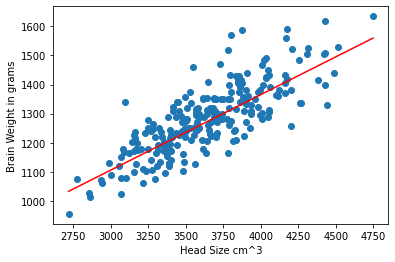

In [21]:
# Task 11

# Plotting code here; not autograde3d
# YOUR CODE HERE

x = df['Head']
y=df['Brain']


plt.scatter(x=x,y=y)
x_bestfit = np.linspace(df['Head'].min(),df['Head'].max())
y_bestfit = 0.26*x_bestfit + 325.57
plt.plot(x_bestfit, y_bestfit, color='red')

plt.xlabel('Head Size cm^3')
plt.ylabel('Brain Weight in grams')


**Task 12** - Making a prediction

We're going to use our model to make a prediction. A healthy human has a brain size of 4100 cubic cm. How much do we expect his or her brain to weigh?

* Assign the value 4100 to the variable `x_healthy` (it is an integer).
* Using your `slope` and `intercept` values, determine the weight of a brain of size `x_healthy`; assign this value to `predict_healthy` and it should be a float.


In [22]:
# Task 12

# YOUR CODE HERE
x_healthy = 4100
predict_healthy = 0.26*x_healthy + 325.57

# View your prediction

print('Prediction for a brain size of 4100 cc:', predict_healthy)

Prediction for a brain size of 4100 cc: 1391.57


**Task 12 - Test**

In [23]:
# Task 12 - Test

assert x_healthy == 4100, "Make sure to correct set your x variable."

**Task 13** - Calculating a residual

Now that we've made a prediction, we can take a look at a *model residual*. For this task, you will calculate and interpret the model residual for the first observation in the dataset. Remember that the first observation in the dataset is `Head`=4512 cubic centimeters.

* Assign the value of 4512 to the variable `x_first` (it is an integer)
* Assign the value of the first observation for `Brain` to the variable `observed_first` (*it is your job to look-up this value in your DataFrame; it should be an integer)
* Calculate the predicted value and assign it to the variable `predict_first` (this variable should be a float).
* Calculate the residual and assign it to the variable `residual_first` (*Hint: use the equation observed - predicted*. Your result will be float).

In [24]:
# Task 13

# YOUR CODE HERE
x_first = 4512 
observed_first = df['Brain'][0]
predict_first = 0.26 * x_first + 325.57
residual_first = observed_first - predict_first
# View your prediction and residual 
print('Prediction for a brain size of 4512 cc:', predict_first)
print('Residual for the prediction:', residual_first)

Prediction for a brain size of 4512 cc: 1498.69
Residual for the prediction: 31.309999999999945


**Task 13 - Test**

In [25]:
# Task 13 - Test

assert x_first == 4512, "Make sure to correct set your x variable."

## Part B

### Sleep Data

Use the following information to answer Tasks 14 - 16 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* Load in the CSV file as a DataFrame and assign it to the variable `df_sleep`.
* Make sure to view the DataFrame!

In [26]:
# Task 14

# Dataset URL
data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 14 - Test**

In [27]:
# Task 14 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 15**

Write a function that replaces the `_` character in each animal name with a space.  For example,  Asian_elephant = Asian elephant.

Hint: use the `string.replace()` string method. Look up the documentation or the Canvas material to help.

* Write your function and define it with the name `name_nospace`. It should return a string.
* Use your function to add an additional column to the `df_sleep` DataFrame; this new column should be named `Animal_name`. (*Hint: consider using the `.apply()` method on your DataFrame*)

In [28]:
# Task 15

# Write your function here

# YOUR CODE HERE
name_nospace_list = []
def name_nospace(i):
  word = ''
  for _ in i:
    _ = _.replace('_',' ')
    name_nospace_list.append(_)
    word = word + str(_)
  return word
    
  
name_nospace(df_sleep['Animal'].values)   
df_sleep['Animal_name'] = name_nospace_list
# View your DataFrame
df_sleep.head()


,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Animal_name
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,African giant pouched rat
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,Asian elephant
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,Baboon
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,Big brown bat
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,Brazilian tapir


**Task 15 - Test**

In [29]:
# Task 15 - Test

assert name_nospace('Test_name') == 'Test name', 'Double check your function and that it returns the correct name.'


**Task 15** - Correlation calculations

On this final graded task, we're going to complete two more correlation calculations.

* Calculate the correlation between life expectancy and total sleep - assign your result to `corr_life_sleep`. Your number should be a float.
* Calculate the correlation between gestation time and total sleep - assign your result to `corr_gest_sleep`. Your number should be a float.

In [30]:
# Task 16

# YOUR CODE HERE
total_sleep = df_sleep['Totsleep']
life_exp = df_sleep['Life']
gest = df_sleep['Gest'] 
corr_life_sleep,_ = st.pearsonr(life_exp,total_sleep)
corr_gest_sleep,_ = st.pearsonr(gest,total_sleep)

print("Correlation between total sleep and life expectancy=", corr_life_sleep)
print("Correlation between total sleep and gestation time=", corr_gest_sleep)

Correlation between total sleep and life expectancy= -0.38244617694907174
Correlation between total sleep and gestation time= -0.6144743061371065


**Task 16 - Test**

In [31]:
# Task 16 - Test

# Hidden tests - you will see the results when you submit to Canvas
